In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
proj = '52Cr'
trg = '149Sm'
cn = '201Rn'
bf = 0.62
ch = 'xn'
sigr = 3.0
# bf_diff = 0.01

In [3]:
df10_mb = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS10' + '_barfac' + f'{bf:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')

df0_mb = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS0' + '_barfac' + f'{bf:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')

df10_mb.describe()

,E_lab,E*/MeV,192Rn,193Rn,194Rn,195Rn,196Rn,197Rn,198Rn,199Rn,200Rn,201Rn
count,69.000000,69.000000,69.0,6.900000e+01,6.900000e+01,6.900000e+01,6.900000e+01,6.900000e+01,6.900000e+01,6.900000e+01,6.900000e+01,69.0
mean,250.545000,57.000000,0.0,3.660232e-14,4.365863e-11,4.138664e-09,2.048507e-08,8.348351e-07,2.143386e-06,1.407024e-06,6.176957e-10,0.0
std,27.064181,20.062403,0.0,1.978186e-13,1.055643e-10,6.937960e-09,3.768357e-08,1.699491e-06,4.629209e-06,2.985957e-06,2.047224e-09,0.0
min,204.679000,23.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,227.612000,40.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,250.545000,57.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.350000e-10,9.820000e-10,0.000000e+00,0.000000e+00,0.000000e+00,0.0
75%,273.478000,74.000000,0.0,0.000000e+00,1.530000e-13,5.850000e-09,1.990000e-08,4.100000e-07,7.440000e-07,4.670000e-07,0.000000e+00,0.0
max,296.411000,91.000000,0.0,1.500000e-12,3.710000e-10,2.160000e-08,1.270000e-07,6.060000e-06,1.700000e-05,1.070000e-05,9.930000e-09,0.0


In [4]:
e_lab = [224, 227, 234, 238, 241, 249, 256]
exp_data = [[np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0.0000000244],[np.nan,np.nan,0.00000035,0.0000025,0.00000434,0.00000395,0.00000208],[0.00000937,0.0000167,0.0000171,0.0000125,np.nan,np.nan,np.nan],[0.0000138,0.0000116,0.00000575,np.nan,np.nan,np.nan,np.nan]]
exp_data=np.array(exp_data)

In [5]:
dfm10_mb = df10_mb.melt(id_vars=['E_lab','E*/MeV'], var_name='isotope', value_name='CS')
dfm0_mb = df0_mb.melt(id_vars=['E_lab','E*/MeV'], var_name='isotope', value_name='CS')

dfm10=dfm10_mb
df10=df10_mb

dfm0=dfm0_mb
df0=df0_mb

mb=1
ub=1e3
nb=1e6

scale=ub

dfm10['CS']=dfm10_mb['CS']*scale
dfm0['CS']=dfm0_mb['CS']*scale
exp_data=exp_data*scale


/tmp/ipykernel_26214/4191472937.py:11: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.lineplot(x='E_lab', y='CS', hue='isotope', data=dfm10[dfm10['isotope'].isin(list(df10.columns[6:-2]))], palette=colors)
/tmp/ipykernel_26214/4191472937.py:12: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.lineplot(x='E_lab', y='CS', hue='isotope', data=dfm0[dfm0['isotope'].isin(list(df0.columns[6:-2]))], palette=colors, ls=':', legend=None)


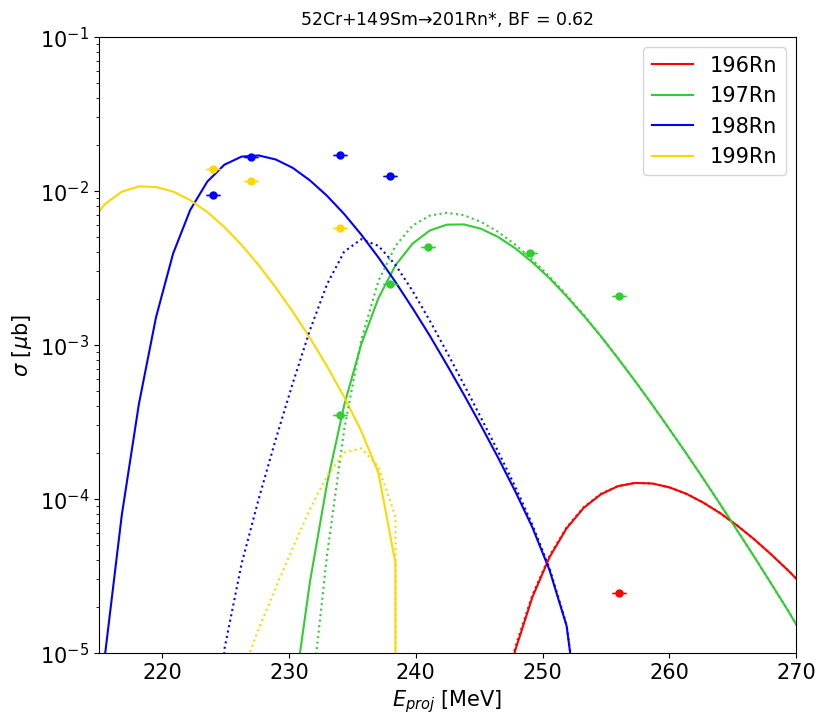

In [6]:
plt.rcParams.update({'font.size': 15})
colors = ['red', 'limegreen', 'blue', 'gold', 'black', 'turquoise', 'magenta', 'grey', 'olive', 'brown']

y_lower = 1e-5
y_upper = 1e-1
x_lower = 215
x_upper = 270

fig,ax=plt.subplots(figsize=(9,8))

sns.lineplot(x='E_lab', y='CS', hue='isotope', data=dfm10[dfm10['isotope'].isin(list(df10.columns[6:-2]))], palette=colors)
sns.lineplot(x='E_lab', y='CS', hue='isotope', data=dfm0[dfm0['isotope'].isin(list(df0.columns[6:-2]))], palette=colors, ls=':', legend=None)

plt.title(proj + '+' + trg + r'$\to$' + cn + '*' + ', BF = ' + str(bf), va='bottom', fontsize='small')

plt.semilogy()
plt.ylim(y_lower,y_upper)
plt.xlim(x_lower,x_upper)

# for energy in e_lab:
#     plt.plot([energy, energy], [y_lower, y_upper], linewidth=1, color='black', linestyle='--')
#     plt.text(energy-1.1, y_upper*0.5, str(energy), rotation=90)
    
for i in range(len(exp_data)):
    (_, caps, _) = plt.errorbar(e_lab, exp_data[i], yerr=0, marker='.', capsize=5, color=colors[i], ls='none', markersize=10)
    for cap in caps:
        cap.set_markeredgewidth(1)

if scale == mb:
    plt.ylabel('$\sigma$ [mb]')
elif scale == ub:
    plt.ylabel('$\sigma$ [$\mu$b]')
elif scale == nb:
    plt.ylabel('$\sigma$ [nb]')
plt.xlabel('$E_{proj}$ [MeV]')
plt.legend(loc='upper right')

plt.savefig(proj + '_' + trg + '_' + cn + '_' + ch + '_barfac' + str(bf) + '_sigr' + str(sigr) + '.png', bbox_inches='tight')
plt.savefig(proj + '_' + trg + '_' + cn + '_' + ch + '_barfac' + str(bf) + '_sigr' + str(sigr) + '.pdf', bbox_inches='tight')